# AUFGABENSTELLUNG

Sie sind ein Datenwissenschaftler in einem großen Finanzinstitut und haben die Aufgabe, eine einfache
Vorhersage des täglichen Schlusskurses für zwei Rüstungsunternehmen (Lockheed Martin und Northrop
Grumman) zu erstellen. Die Vorgesetzten möchten einen Bericht darüber, wie sich die Aktien dieser
beiden Unternehmen in den nächsten Tagen entwickeln könnten.
Ihre Aufgabe besteht darin, ein LSTM-basiertes neuronales Netzwerk zu erstellen, das die historischen
Schlusskurse analysiert und zukünftige Kurse vorhersagt. Da die Finanzmärkte komplex sind, sollen Sie
folgende Schritte umsetzen:

1. Beschaffen Sie historische Schlusskurse der Aktien von Lockheed Martin (LMT) und Northrop
Grumman (NOC) mit dem Zeitraum vom 1. Januar 2015 bis zum 1. Januar 2023. Nutzen Sie
hierzu die Python-Bibliothek yfinance.

In [1]:
# Imports

import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
start_date = '2015-01-01'
end_date = '2023-01-01'

# Daten Lockheed Martin (LMT)
lmt_data = yf.download('LMT', start=start_date, end=end_date)

# Daten Northrop Grumman (NOC)
noc_data = yf.download('NOC', start=start_date, end=end_date)

print(lmt_data.head())
print(noc_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  192.100006  194.479996  191.039993  193.309998  148.800446   
2015-01-05  192.899994  194.500000  188.600006  189.289993  145.705994   
2015-01-06  189.619995  190.990005  186.800003  188.399994  145.020920   
2015-01-07  189.320007  191.020004  189.220001  190.830002  146.891434   
2015-01-08  190.899994  196.880005  190.899994  195.130005  150.201401   

             Volume  
Date                 
2015-01-02   902100  
2015-01-05  1506200  
2015-01-06  1205800  
2015-01-07   941900  
2015-01-08  1950900  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  148.289993  149.160004  144.539993  146.460007  125.043556   
2015-01-05  145.449997  146.470001  142.449997  143.369995  122.405342   
2015-01-06  143.460007  146.000

In [3]:
# Die Adjusted Close Werte werden extrahieren
lmt_close = lmt_data['Adj Close'].values
noc_close = noc_data['Adj Close'].values

print(lmt_close, "Größe Datensatz:", len(lmt_close))
print(noc_close, "Größe Datensatz:", len(lmt_close))

[148.80044556 145.70599365 145.0209198  ... 461.33721924 464.99371338
 464.45910645] Größe Datensatz: 2014
[125.04355621 122.4053421  123.07989502 ... 525.1015625  526.64648438
 530.1541748 ] Größe Datensatz: 2014


2. Skalieren Sie die Daten auf einen Wertebereich von 0 bis 1, um die neuronale Netzwerkanalyse zu
erleichtern.

In [4]:
scaler_LMT = MinMaxScaler(feature_range=(0, 1))
scaler_NOC = MinMaxScaler(feature_range=(0, 1))

# Schlusskurse von Lockheed Martin skalieren
lmt_scaled = scaler_LMT.fit_transform(lmt_close.reshape(-1, 1))

# Schlusskurse von Northrop Grumman skalieren
noc_scaled = scaler_NOC.fit_transform(noc_close.reshape(-1, 1))

print(lmt_scaled)
print(noc_scaled)

[[0.01247665]
 [0.00307283]
 [0.00099094]
 ...
 [0.96225395]
 [0.97336578]
 [0.97174114]]
[[0.0064459 ]
 [0.        ]
 [0.00164812]
 ...
 [0.98389976]
 [0.98767444]
 [0.99624471]]


3. Erstellen Sie Datensätze für die Vorhersage, indem Sie eine bestimmte Anzahl von Tagen (z.B.
60 Tage) als Eingabe für das neuronale Netzwerk verwenden, um den Kurs des nächsten Tages
vorherzusagen.

In [5]:
# Datensätze mit Daten der jeweils letzten 60 Tage generieren

def dataset_60(data, days_past):

    X = []
    y = []

    for i in range(days_past, len(data)):
        # Eingabedaten für den aktuellen Tag sammeln ('days_past' Tage)
        past_days = data[i-days_past:i]  # days_past Tage ab dem aktuellen Tag i - i
        print(f"Eingabewerte für Tag {i}: {past_days}") # Ausgabe der Tageswerte

        # Zielwert für den aktuellen Tag (Kurs am Tag i)
        target_value = data[i]  # Der Wert für den nächsten Tag (der Wert am Tag i) wird festgelegt
        print(f"Zielwert für Tag {i}: {target_value}")  # Ausgabe des Zielwerts

        # Eingabewerte und Zielwert zu den Listen hinzufügen
        X.append(past_days)
        y.append(target_value)

    # Listen in NumPy-Arrays umwandeln
    X = np.array(X)
    y = np.array(y)

    # Ergebnisse (erstellte NumPy-Arrays) zurückgeben
    return X, y

days_past = 60  # Anzahl der Tage deklariert

# Datensätze für Lockheed Martin erstellen
X_train_LMT, y_train_LMT = dataset_60(lmt_scaled, days_past)

# Datensätze für Northrop Grumman erstellen
X_train_NOC, y_train_NOC = dataset_60(noc_scaled, days_past)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 [0.78717923]
 [0.77251284]
 [0.78192112]
 [0.75968577]
 [0.74768388]
 [0.79446508]
 [0.78229841]
 [0.77670999]
 [0.79430015]
 [0.80165683]
 [0.79658737]
 [0.78984367]
 [0.82936258]
 [0.84775436]
 [0.79585643]
 [0.83714367]
 [0.83127251]
 [0.8337483 ]
 [0.82214734]
 [0.80651424]
 [0.79783712]
 [0.78319429]
 [0.78840542]
 [0.76025162]
 [0.7794217 ]
 [0.77630914]
 [0.77095663]
 [0.76635878]
 [0.76982484]
 [0.74938161]
 [0.7521168 ]
 [0.77251284]
 [0.83014064]
 [0.82243016]
 [0.83521033]
 [0.83686078]
 [0.8281129 ]
 [0.82705172]
 [0.80927307]
 [0.81795026]
 [0.81655907]
 [0.80988605]
 [0.8317439 ]
 [0.84893335]
 [0.84570291]
 [0.86223203]
 [0.86310442]
 [0.85808216]
 [0.84261406]
 [0.83952514]
 [0.85369636]
 [0.86687716]
 [0.84884671]
 [0.85045563]
 [0.83890858]
 [0.83195193]
 [0.83746526]
 [0.82949105]]
Zielwert für Tag 1932: [0.83609278]
Eingabewerte für Tag 1933: [[0.79458319]
 [0.78717923]
 [0.77251284]
 [0.78192112]
 

4. Entwickeln Sie ein LSTM-basiertes neuronales Netzwerk zur Vorhersage der Schlusskurse.

In [6]:
def lstm_model(input_shape):
    model = Sequential()

    # Erste LSTM-Schicht
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))  # Regularisierung (Prävention für Overfitting)

    # Zweite LSTM-Schicht
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Dense-Schicht für die Vorhersage des Schlusskurses
    model.add(Dense(units=1))  # Vorhersage eines Wertes (Schlusskurs)

    # Kompilieren des Modells mit Adam-Optimizer und MSE-Verlustfunktion
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

5. Trainieren Sie das Modell für beide Aktien getrennt und verwenden Sie den gleichen Modellaufbau.

In [7]:
# Lockheed Martin (LMT) Training
lmt_model = lstm_model((X_train_LMT.shape[1], X_train_LMT.shape[2]))
lmt_history = lmt_model.fit(X_train_LMT, y_train_LMT, epochs=20, batch_size=32)

# Northrop Grumman (NOC) Training
noc_model = lstm_model((X_train_NOC.shape[1], X_train_NOC.shape[2]))
noc_history = noc_model.fit(X_train_NOC, y_train_NOC, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0620
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0032
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - loss: 0.0032
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0028
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0026
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0029
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0027
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0026
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0024
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0024
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0019
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0025
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0019
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0021
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0020
Epoch 16/20

5.1 Vorhersagen treffen

In [8]:
# Vorhersagen für Lockheed Martin und Northrop Grumman
predicted_LMT = lmt_model.predict(X_train_LMT)
predicted_NOC = noc_model.predict(X_train_NOC)

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


6. Stellen Sie die tatsächlichen und vorhergesagten Kurse grafisch dar, um die Vorhersageleistung zu
evaluieren.

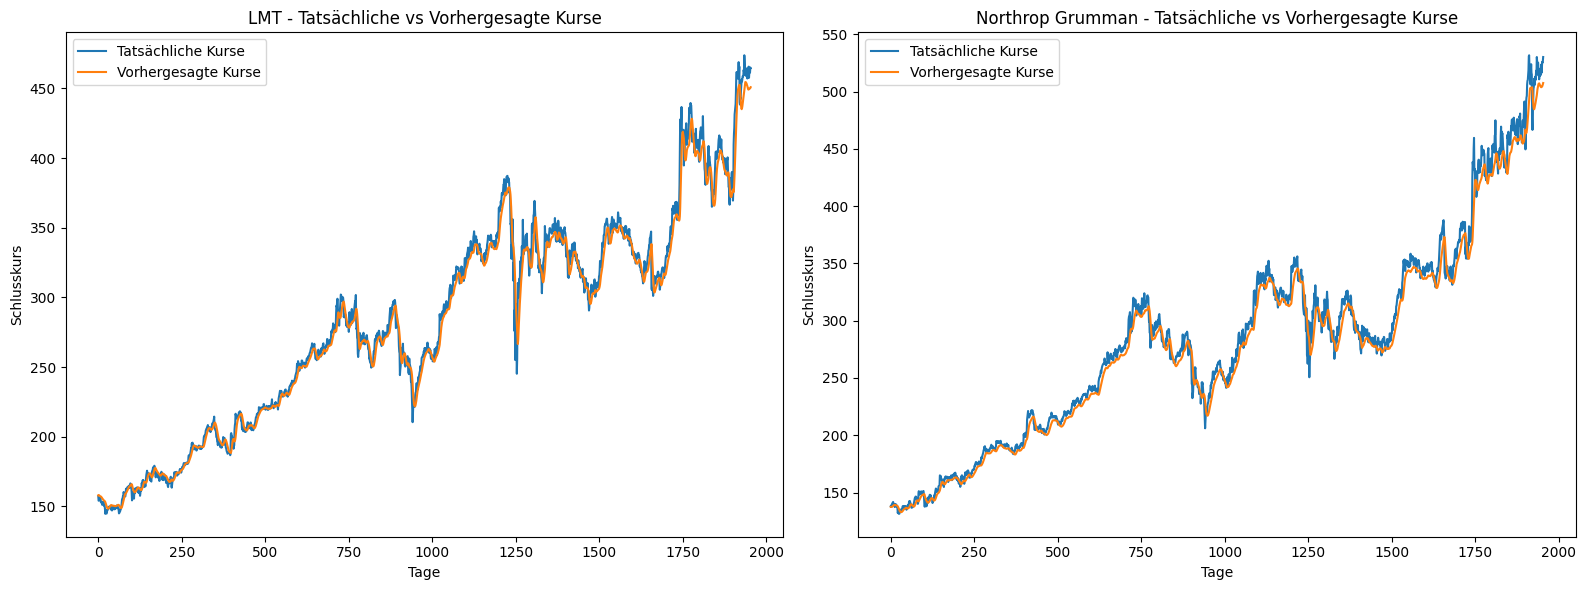

In [9]:
# Skalierte Werte zurücktransformieren, um die echten Kurswerte zu erhalten
predicted_LMT_unscaled = scaler_LMT.inverse_transform(predicted_LMT)
actual_LMT_unscaled = scaler_LMT.inverse_transform(y_train_LMT.reshape(-1, 1))

predicted_NOC_unscaled = scaler_NOC.inverse_transform(predicted_NOC)
actual_NOC_unscaled = scaler_NOC.inverse_transform(y_train_NOC.reshape(-1, 1))


# Plot erstellen

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot für Lockheed Martin
axes[0].plot(actual_LMT_unscaled, label='Tatsächliche Kurse')
axes[0].plot(predicted_LMT_unscaled, label='Vorhergesagte Kurse')
axes[0].set_title('LMT - Tatsächliche vs Vorhergesagte Kurse')
axes[0].set_xlabel('Tage')
axes[0].set_ylabel('Schlusskurs')
axes[0].legend()

# Plot für Northrop Grumman
axes[1].plot(actual_NOC_unscaled, label='Tatsächliche Kurse')
axes[1].plot(predicted_NOC_unscaled, label='Vorhergesagte Kurse')
axes[1].set_title('Northrop Grumman - Tatsächliche vs Vorhergesagte Kurse')
axes[1].set_xlabel('Tage')
axes[1].set_ylabel('Schlusskurs')
axes[1].legend()

plt.tight_layout()
plt.show()

7. Optional: Stellen Sie den Trainingsverlust während der Epochen grafisch dar, um den Lernfortschritt des Modells zu visualisieren.

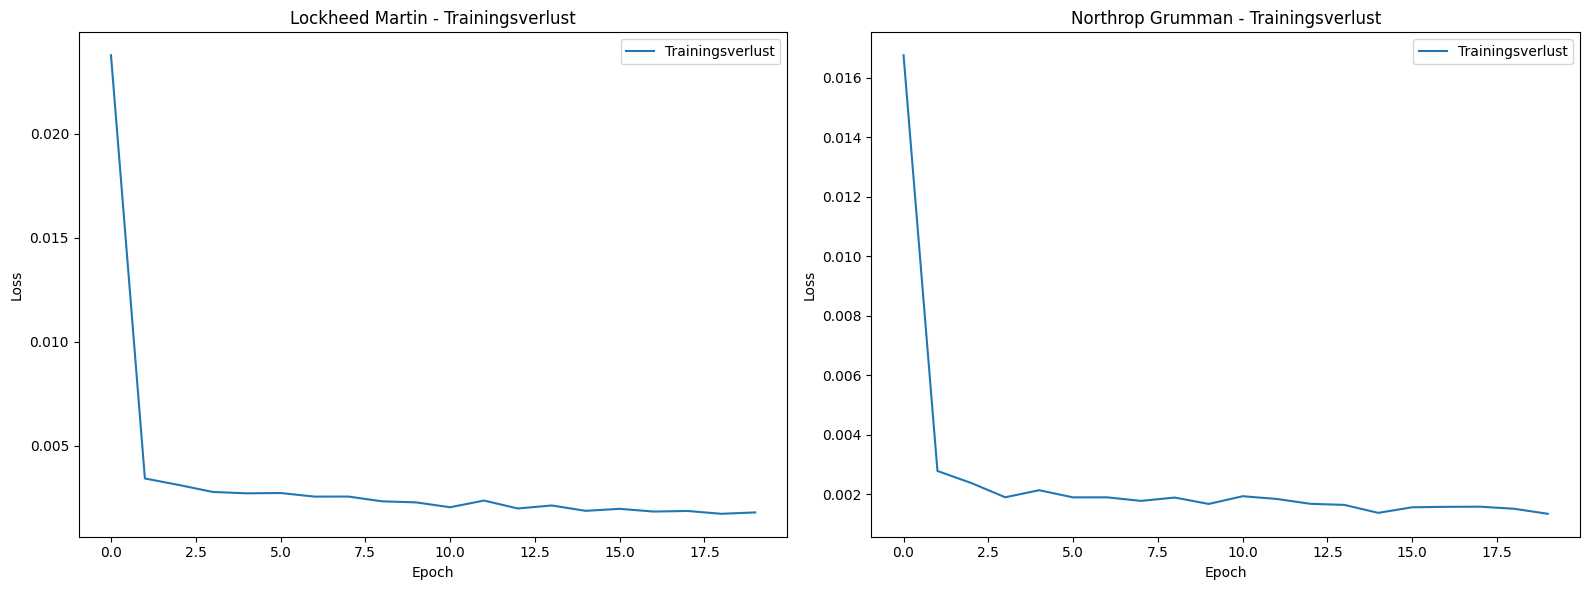

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot für Lockheed Martin Trainingsverlust
axes[0].plot(lmt_history.history['loss'], label='Trainingsverlust')
axes[0].set_title('Lockheed Martin - Trainingsverlust')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot für Northrop Grumman Trainingsverlust
axes[1].plot(noc_history.history['loss'], label='Trainingsverlust')
axes[1].set_title('Northrop Grumman - Trainingsverlust')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

Bonus - Mit Keras Tuner nochmal Modelle erstellen und hyperparametrisieren

In [11]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [12]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Erste LSTM-Schicht mit variabler Einheitenzahl
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),  # Testet 32, 64, 96, 128
        return_sequences=True,
        input_shape=(X_train_LMT.shape[1], X_train_LMT.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout-Rate 0.2 bis 0.5

    # Zweite LSTM-Schicht mit variabler Einheitenzahl
    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),  # Testet verschiedene Einheiten
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout für die zweite Schicht

    # Dense-Schicht für die Vorhersage des Schlusskurses
    model.add(Dense(units=1))

    # Kompilieren des Modells
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),  # Optimizer: adam oder rmsprop
        loss='mean_squared_error'
    )

    return model

# RandomizedSearch für Hyperparameter-Tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='tuning',
    project_name='lstm_test'
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Tuner für LMT
tuner_LMT = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Metrik zur Bewertung
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir_LMT',
    project_name='lstm_tuning_LMT'
)

# Suchen der besten Hyperparameter für LMT-Modell
tuner_LMT.search(X_train_LMT, y_train_LMT, epochs=20, validation_split=0.2, batch_size=32)

# Zeige die besten Hyperparameter an (LMT)
best_hp_LMT = tuner_LMT.get_best_hyperparameters(num_trials=1)[0]

print("")
print(f"Beste Anzahl LSTM-Einheiten in der ersten Schicht (LMT): {best_hp_LMT.get('units_1')}")
print(f"Beste Dropout-Rate in der ersten Schicht (LMT): {best_hp_LMT.get('dropout_1')}")
print(f"Beste Anzahl LSTM-Einheiten in der zweiten Schicht (LMT): {best_hp_LMT.get('units_2')}")
print(f"Beste Dropout-Rate in der zweiten Schicht (LMT): {best_hp_LMT.get('dropout_2')}")
print(f"Bester Optimizer (LMT): {best_hp_LMT.get('optimizer')}")

# Bestes Modell erstellen und trainieren für LMT
best_model_LMT = tuner_LMT.hypermodel.build(best_hp_LMT)
best_history_LMT = best_model_LMT.fit(X_train_LMT, y_train_LMT, epochs=20, validation_split=0.2)

# Vorhersagen mit dem besten Modell machen für LMT
predicted_LMT_best = best_model_LMT.predict(X_train_LMT)
predicted_LMT_best_unscaled = scaler_LMT.inverse_transform(predicted_LMT_best)



# Tuner für NOC erstellen
tuner_NOC = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Die Metrik zur Bewertung
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir_NOC',
    project_name='lstm_tuning_NOC'
)

# Suchen der besten Hyperparameter für NOC-Modell
tuner_NOC.search(X_train_NOC, y_train_NOC, epochs=20, validation_split=0.2, batch_size=32)

# Zeige die besten Hyperparameter an (NOC)
best_hp_NOC = tuner_NOC.get_best_hyperparameters(num_trials=1)[0]

print("")
print(f"Beste Anzahl LSTM-Einheiten in der ersten Schicht (NOC): {best_hp_NOC.get('units_1')}")
print(f"Beste Dropout-Rate in der ersten Schicht (NOC): {best_hp_NOC.get('dropout_1')}")
print(f"Beste Anzahl LSTM-Einheiten in der zweiten Schicht (NOC): {best_hp_NOC.get('units_2')}")
print(f"Beste Dropout-Rate in der zweiten Schicht (NOC): {best_hp_NOC.get('dropout_2')}")
print(f"Bester Optimizer (NOC): {best_hp_NOC.get('optimizer')}")

# Bestes Modell erstellen und trainieren für NOC
best_model_NOC = tuner_NOC.hypermodel.build(best_hp_NOC)
best_history_NOC = best_model_NOC.fit(X_train_NOC, y_train_NOC, epochs=20, validation_split=0.2)

# Vorhersagen mit dem besten Modell machen für NOC
predicted_NOC_best = best_model_NOC.predict(X_train_NOC)
predicted_NOC_best_unscaled = scaler_NOC.inverse_transform(predicted_NOC_best)

Trial 5 Complete [00h 02m 56s]
val_loss: 0.0013572459574788809

Best val_loss So Far: 0.0009153896826319396
Total elapsed time: 00h 12m 12s

Beste Anzahl LSTM-Einheiten in der ersten Schicht (NOC): 128
Beste Dropout-Rate in der ersten Schicht (NOC): 0.2
Beste Anzahl LSTM-Einheiten in der zweiten Schicht (NOC): 128
Beste Dropout-Rate in der zweiten Schicht (NOC): 0.2
Bester Optimizer (NOC): adam
Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - loss: 0.0185 - val_loss: 0.0012
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - loss: 8.6052e-04 - val_loss: 0.0020
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 225ms/step - loss: 7.3286e-04 - val_loss: 0.0011
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - loss: 6.8979e-04 - val_loss: 0.0024
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - loss: 7.1618e-04 - val_loss: 0.0015
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 7.1642e-04 - val_loss: 0.0029
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - loss:

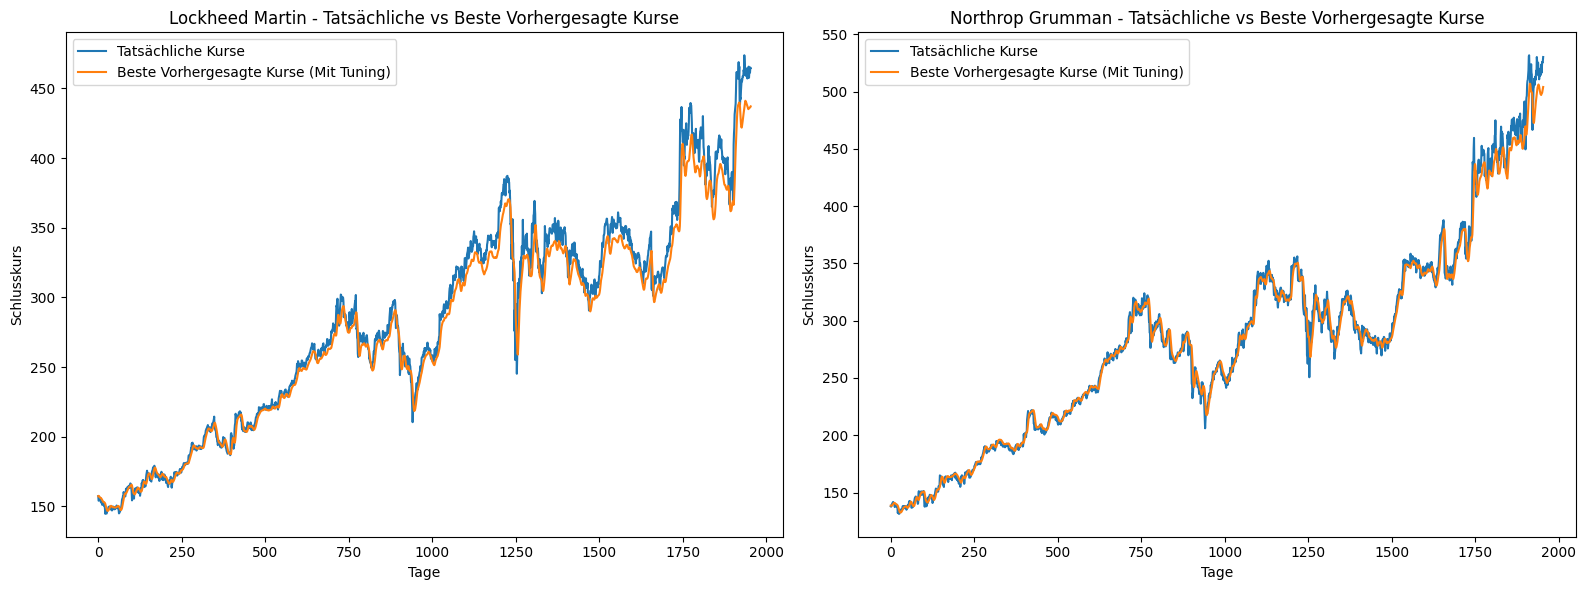

In [14]:
# Subplots nach Hyperparameter-Tuning
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Lockheed Martin Plot
axes[0].plot(scaler_LMT.inverse_transform(y_train_LMT.reshape(-1, 1)), label='Tatsächliche Kurse')
axes[0].plot(predicted_LMT_best_unscaled, label='Beste Vorhergesagte Kurse (Mit Tuning)')
axes[0].set_title('Lockheed Martin - Tatsächliche vs Beste Vorhergesagte Kurse')
axes[0].set_xlabel('Tage')
axes[0].set_ylabel('Schlusskurs')
axes[0].legend()

# Northrop Grumman Plot
axes[1].plot(scaler_NOC.inverse_transform(y_train_NOC.reshape(-1, 1)), label='Tatsächliche Kurse')
axes[1].plot(predicted_NOC_best_unscaled, label='Beste Vorhergesagte Kurse (Mit Tuning)')
axes[1].set_title('Northrop Grumman - Tatsächliche vs Beste Vorhergesagte Kurse')
axes[1].set_xlabel('Tage')
axes[1].set_ylabel('Schlusskurs')
axes[1].legend()

plt.tight_layout()
plt.show()